<h1> Crop Yield Prediction model for Kogi state </h1>
    <h4> Using Agricultural development program (ADP) crop yield datase and NIMET Climate condtion dataset</h4>

In [624]:
import time
import warnings
warnings.filterwarnings('ignore')
#data analysis
import pandas as pd
import numpy as np

#visualisation

import seaborn as sns

import matplotlib.pyplot as plt
%matplolib inline



UsageError: Line magic function `%matplolib` not found.


In [625]:
dataset = pd.read_csv('maize.csv')

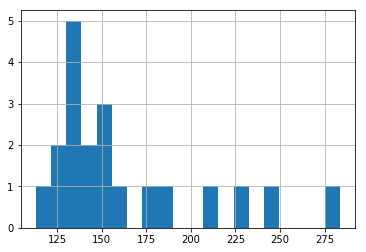

In [626]:
Yieed= dataset['area']
Yieed.hist(bins=20)

In [627]:
dataset.head()

,id,crops,years,area,average_humidity,average_rainfall,temp_max,temp_min,soil_temp,windspeed,cropyield
0,1,maize,1994,113.070,82.0000,169.1143,27.88571,2.437143e+01,31.27143,2.571429,123.580
1,2,maize,1995,154.170,80.7143,175.7286,27.27143,2.392857e+01,32.17143,2.571429,184.740
2,3,maize,1996,131.030,79.4286,194.7857,27.54286,2.374286e+01,31.78571,3.000000,157.030
3,4,maize,1997,146.356,79.8571,147.2857,27.50000,2.312857e+06,31.22857,3.000000,200.613
4,5,maize,1998,159.400,77.2857,248.2000,28.27143,2.450000e+01,31.31429,2.571429,189.101


In [628]:
dataset.describe()

,id,years,area,average_humidity,average_rainfall,temp_max,temp_min,soil_temp,windspeed,cropyield
count,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,20.000000
mean,10.50000,2003.50000,163.338350,83.814280,176.310715,29.165713,1.156658e+05,1.584587e+05,2.778572,21095.846000
std,5.91608,5.91608,45.507266,6.083751,31.550636,1.910659,5.171651e+05,7.085069e+05,0.238483,93207.170752
min,1.00000,1994.00000,113.070000,77.285700,129.042900,27.271430,2.354286e+01,3.077143e+01,2.428571,123.580000
25%,5.75000,1998.75000,131.021250,79.749975,151.164250,27.682142,2.391071e+01,3.126072e+01,2.571429,210.615750
50%,10.50000,2003.50000,147.628000,81.428550,170.828600,28.135715,2.418571e+01,3.171428e+01,2.714286,247.900000
75%,15.25000,2008.25000,182.935000,89.750000,195.150000,30.707142,2.448928e+01,3.215000e+01,3.000000,294.470000
max,20.00000,2013.00000,283.690000,96.428600,248.200000,32.657140,2.312857e+06,3.168571e+06,3.285714,417089.090000


In [629]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
id                  20 non-null int64
crops               20 non-null object
years               20 non-null int64
area                20 non-null float64
average_humidity    20 non-null float64
average_rainfall    20 non-null float64
temp_max            20 non-null float64
temp_min            20 non-null float64
soil_temp           20 non-null float64
windspeed           20 non-null float64
cropyield           20 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 1.8+ KB


<h3> visualize dataset</h3>

In [630]:

# print the join histogram for each feature for index, feature_name in enumerate(data.feature_names)
feature_name = ['area', 'average_rainfall', 'average_humidity', 'soil_temp','temp_max','windspeed','years']
for index,feature_name in enumerate(dataset.feature_names):
    plt.figure(figsize=(4,3))
    plt.scatter(data.data[:,index],data.target)
    plt.ylabel('price',size=15)
    plt.xlabel(feature_name,size=15)
    plt.tight_layout()

AttributeError: 'DataFrame' object has no attribute 'feature_names'

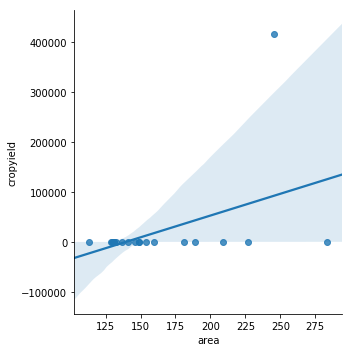

In [631]:
sns.lmplot('area', 'cropyield' ,data=dataset)

<h1> Loading Algorithms</h1>

In [632]:
import xgboost as xgb
#using sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier

<h1>Using sklearn Decision tree regression <h1>

In [633]:
#split dataset in features and target variable
dataset = pd.read_csv('surghum.csv')
dataset.head()
feature_cols = ['area', 'average_rainfall', 'average_humidity', 'soil_temp','temp_max','windspeed','years']
X = dataset[feature_cols] # Features
y = dataset.cropyield # Target variable

In [634]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test



In [635]:
regressor = DecisionTreeRegressor()

regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [636]:
y_pred = regressor.predict(X_test)

In [637]:
r_sqtest = regressor.score(X_test,y_test)
r_sqtrain =regressor.score(X_train,y_train)
print('model r-Squared=' ,r_sqtest)
print('model r-Squared Train=' ,r_sqtrain )
print('accuracy:' ,r_sqtest *100,'%')

model r-Squared= 0.41402621637554027
model r-Squared Train= 1.0
accuracy: 41.40262163755403 %


In [638]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
3,60.89,70.600
16,105.56,89.990
6,45.00,80.071
10,51.52,53.360
2,56.04,70.600
14,94.49,100.440


In [495]:
from sklearn import metrics
now = time.time()
print('Exec. time: {:5.2f} s'.format(after-now))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Exec. time: -31944.59 s
Mean Absolute Error: 42.658166666666666
Mean Squared Error: 3109.8292908333347
Root Mean Squared Error: 55.765843406455666


In [545]:
# import export_graphviz 
from sklearn.tree import export_graphviz
 
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot', 
               feature_names =['area', 'average_rainfall', 'average_humidity', 'soil_temp','temp_max','windspeed','years']) 

<h1>Using sklearn linear regression </h1>

In [526]:

models = LinearRegression()
models = lm.fit(X_train,y_train)



In [527]:
y_pred =models.predict(X_test)

In [528]:
r_sqtest = models.score(X_test,y_test)
r_sqtrain =models.score(X_train,y_train)
print('model r-Squared=' ,r_sqtest)
print('model r-Squared Train=' ,r_sqtrain )
print('accuracy:' ,r_sqtest *100,'%')

model r-Squared= -3013090.7115223026
model r-Squared Train= 0.8585611320426415
accuracy: -301309071.15223026 %


In [529]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df


,Actual,Predicted
3,200.613,-200049.520308
16,371.340,21345.773536
6,245.800,-65857.167321
10,255.000,56373.772607
2,157.030,-198444.414990
14,310.010,21239.710626


In [530]:
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 93829.57539779811
Mean Squared Error: 14656591333.273443
Root Mean Squared Error: 121064.4098539015


In [507]:
#using statmodel
import statsmodels.formula.api as smf
model1 = smf.ols(formula='cropyield ~ + area + average_rainfall + soil_temp + temp_max + windspeed', data=cropdata).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cropyield   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1.802
Date:                Thu, 07 Nov 2019   Prob (F-statistic):              0.177
Time:                        13:21:23   Log-Likelihood:                -251.75
No. Observations:                  20   AIC:                             515.5
Df Residuals:                      14   BIC:                             521.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.594e+04   4.19e+05      0.110      0.914   -8.53e+05    9.45e+05
area               483.9484    828.091      0.584      0.568   -1292.130    2260.027
average_rainfall    -0.3656    639.821     -0.001      1.000   -1372.646    1371.914
soil_temp         5.408e-05      0.028      0.002      0.998      -0.060       0.060
temp_max           1.75e+04   2.23e+04      0.785      0.445   -3.03e+04    6.53e+04
windspeed         -2.21e+05   1.05e+05     -2.102      0.054   -4.47e+05    4503.529
==============================================================================
Omnibus:                       20.459   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.420
Skew:                           1.877   Prob(JB):                     3.02e-06
Kurtosis:                       7.051   Cond. No.                     1.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1> Using Xgboots algorithm<h1>

In [549]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [550]:
model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# fit model no training data
# model = xgb.XGBRegressor()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

[13:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [554]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))
data_dmatrix = xgb.DMatrix(data=X,label=y)

RMSE: 25078.610501


In [558]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[14:03:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:03:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:03:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [559]:
model = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:03:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [561]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,72007.253367,50782.305627,55434.69074,72344.52566


In [562]:
model = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:05:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ImportError: You must install graphviz to plot tree

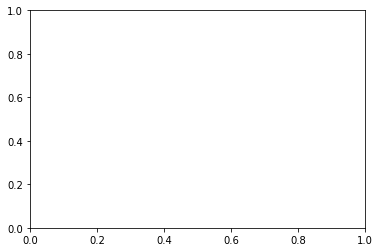

In [563]:
import matplotlib.pyplot as plt

xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [525]:
r_sqtest = model.score(X_test,y_test)
r_sqtrain =model.score(X_train,y_train)
print('model r-Squared=' ,r_sqtest)
print('model r-Squared Train=' ,r_sqtrain )
print('accuracy:' ,r_sqtest *100,'%')

model r-Squared= 0.8861389244523574
model r-Squared Train= 0.9999622053770698
accuracy: 88.61389244523575 %


In [511]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19.68304888916015
Mean Squared Error: 553.8547820124719
Root Mean Squared Error: 23.53411952915324


<h4> The mean absolute error for our algorithm is 19.68, which is less than 0.2 percent of the mean of all the values in the 'CropYield' column. This means that our algorithm did a fine prediction job.</h4>

In [512]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
3,200.613,210.683838
16,371.340,331.569916
6,245.800,244.775497
10,255.000,241.897308
2,157.030,185.162598
14,310.010,284.012421


<h4> The mean absolute error for our algorithm is 17.7, which is less than 0.2 percent of the mean of all the values in the 'CropYield' column. This means that our algorithm did a fine prediction job.<h4>

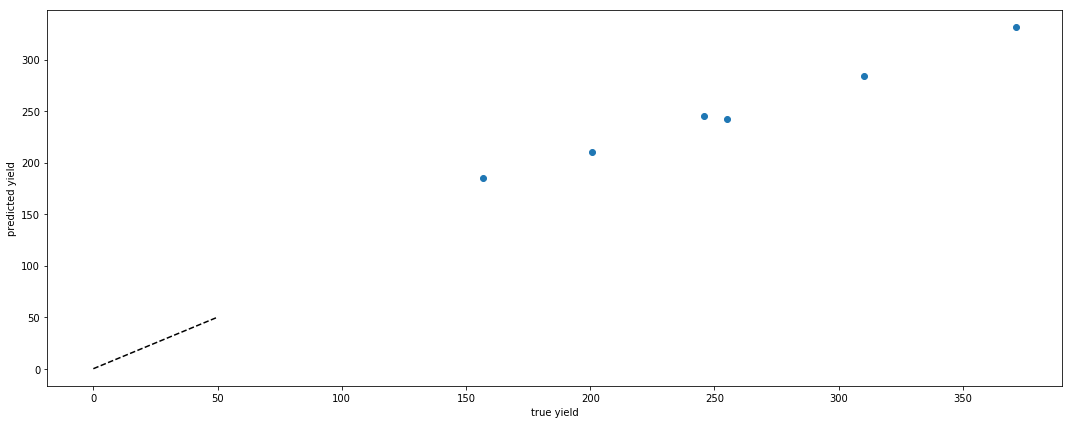

In [513]:
# visualizing predicted & expected
plt.figure(figsize=(15,6))
plt.scatter(y_test,y_pred)
plt.plot([0,50],[0,50],'--k')
plt.axis('tight')
plt.xlabel('true yield')
plt.ylabel('predicted yield')
plt.tight_layout()

<h1> Using random forest algorithm<h1>

In [514]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred =rf.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df


,Actual,Predicted
3,200.613,272.5774
16,371.340,347.3370
6,245.800,301.6050
10,255.000,298.4086
2,157.030,192.4253
14,310.010,279.6370


In [515]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 43.49154999999998
Mean Squared Error: 2154.811641068332
Root Mean Squared Error: 46.41994874047506


In [516]:

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

46.41994874047506


In [524]:
r_sqtest = rf.score(X_test,y_test)
r_sqtrain =rf.score(X_train,y_train)
print('model r-Squared=' ,r_sqtest)
print('model r-Squared Train=' ,r_sqtrain )
print('accuracy:' ,r_sqtest *100,'%')

model r-Squared= 0.5570153422470655
model r-Squared Train= 0.8493018348414799
accuracy: 55.70153422470655 %


In [534]:
est = GradientBoostingRegressor()
est.fit(X_train, y_train)

y_pred =est.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df


,Actual,Predicted
3,200.613,215.628572
16,371.340,356.717392
6,245.800,249.127917
10,255.000,247.981320
2,157.030,185.723910
14,310.010,295.944966


In [535]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13.790620267379088
Mean Squared Error: 253.46510529927843
Root Mean Squared Error: 15.920587467153291


In [536]:
r_sqtest = est.score(X_test,y_test)
r_sqtrain =est.score(X_train,y_train)
print('model r-Squared=' ,r_sqtest)
print('model r-Squared Train=' ,r_sqtrain )
print('accuracy:' ,r_sqtest *100,'%')

model r-Squared= 0.9478928223779018
model r-Squared Train= 0.9999999992809189
accuracy: 94.78928223779019 %


In [537]:

from sklearn.model_selection import train_test_split
# training set and testing set

In [145]:
X_train, X_test, y_train, y_test= train_test_split(X, y ,test_size=0.3 ,random_state=5)
#train set70% test set =30%

In [146]:
X_train.shape ,y_train.shape

((35, 6), (35,))

In [147]:
from sklearn.model_selection import cross_val_score
cv_k = 5
cv_scoring = 'neg_mean_squared_error'
cv_scoring = 'r2'

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
lm=LinearRegression()
model2 =lm.fit(X_train, y_train)


In [95]:
df_maize =  pd.read_csv('maize.csv')
from sklearn.model_selection import train_test_split
y = df_maize['cropyield']
X=df_maize[['area','average_humidity', 'average_rainfall', 'temp_max', 'soil_temp','windspeed']]
#X = df_all.drop('cropyield',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [96]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier

In [97]:
# Use cros validation. Set 'k' and the scoring function. If scoring function is not set, 
# cross_val_score will use the default scoring for the respective estimator. To make sure 
# I compare all estimators on the same scale, I set the scoring function explicitly.
from sklearn.model_selection import cross_val_score
cv_k = 5
cv_scoring = 'neg_mean_squared_error'
cv_scoring = 'r2'

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
kf = KFold(n_splits=cv_k, shuffle=True)


In [98]:
import time
now = time.time()
est = LinearRegression()
fet =est.fit(X_train,y_train)
pred = fet.predict(X_test)
print(pred)
scores = cross_val_score(est, X_train, y_train, cv=kf, scoring=cv_scoring)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
after = time.time()
print('Exec. time: {:5.2f} s'.format(after-now))


[179.52600154 200.06522886 256.36425827 455.69732591 434.49901928
 379.67453333]
Accuracy: -654250264357.26 (+/- 2617001057399.76)
Exec. time:  0.07 s


In [84]:
# Random forest regression
now = time.time()
est = RandomForestRegressor(n_estimators=10, n_jobs=-1)
scores = cross_val_score(est, X_train, y_train, cv=kf, scoring=cv_scoring)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
after = time.time()
print('Exec. time: {:5.2f} s'.format(after-now))

Accuracy: -1.6758 (+/- 3.7934)
Exec. time:  0.98 s


In [85]:
# Linear regression with L2 regularization
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
now = time.time()
est = linear_model.Ridge(alpha = 1.0)
scores = cross_val_score(est, X_train, y_train, cv=kf, scoring=cv_scoring)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
after = time.time()
print('Exec. time: {:5.2f} s'.format(after-now))

Accuracy: 0.13 (+/- 1.18)
Exec. time:  0.08 s


In [86]:
# Gradient boosted regression
now = time.time()
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                max_depth=0.3, random_state=0, loss='ls')
scores = cross_val_score(est, X_train, y_train, cv=kf, scoring=cv_scoring)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
after = time.time()
print('Exec. time: {:5.2f} s'.format(after-now))

Accuracy: -1.4114 (+/- 2.6019)
Exec. time:  0.38 s


In [87]:
 prediction = model2.predict(X_test)

NameError: name 'model2' is not defined

In [171]:
print(prediction)

[-24003.60081895 122068.8958426   20134.95183054  21505.97757875
  46236.73251948  -3771.64475812  52156.61564454 -14035.84112174
  60479.54369543  35438.83196629  -6418.98436297 135070.79571753
 -61822.72581001  74826.88850185 -69997.89399349]


In [172]:
cropdata.tail()

,id,crops,years,area,average_humidity,average_rainfall,temp_max,temp_min,soil_temp,windspeed,cropyield
45,46,sorghum,2014,91.600,89.7143,152.3571,32.02857,24.81429,32.05714,3.000000,100.44
46,47,sorghum,2015,94.260,89.8571,196.2429,32.65714,25.07143,32.34286,3.142857,105.56
47,48,sorghum,2016,106.700,90.8571,147.5857,32.58571,24.48571,31.74286,3.000000,124.98
48,49,sorghum,2017,20.051,96.4286,194.4143,31.57143,24.18571,34.38571,3.285714,29852.19
49,50,sorghum,2018,104.854,77.5714,172.5429,31.32857,23.85714,30.87143,2.428571,131105.52


In [173]:
yield1 =cropdata[cropdata['id']==3]

In [174]:
yield1

,id,crops,years,area,average_humidity,average_rainfall,temp_max,temp_min,soil_temp,windspeed,cropyield
2,3,maize,1991,105.03,77.7143,214.325,31.57143,23.64286,30.22857,3.0,100.45


In [175]:
yield1['cropyield']

2    100.45
Name: cropyield, dtype: float64

In [176]:
prediction[2]

20134.951830538426

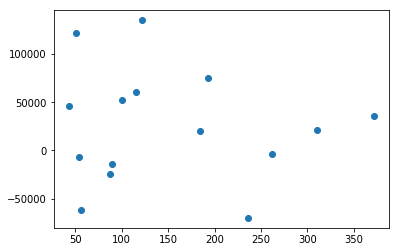

In [177]:
plt.scatter(y_test, prediction)

In [178]:
print('modelcoef' , model2.coef_)
print('model intercept' ,model2.intercept_)

modelcoef [ 2.69939374e+02 -4.89500823e+03 -2.60144674e+02  2.43597329e+04
  5.08811927e-05 -1.49577885e+05]
model intercept 139634.5782950937


In [179]:
dframe_coef= pd.DataFrame(model2.coef_, X.columns, columns=['coefi value'])

In [180]:
dframe_coef

,coefi value
area,269.939374
average_humidity,-4895.008229
average_rainfall,-260.144674
temp_max,24359.732915
soil_temp,0.000051
windspeed,-149577.884660


In [181]:
model2.intercept_

139634.5782950937

<h3> RSME <h3>

In [182]:
from sklearn import metrics


In [183]:
mean_sq_error = metrics.mean_squared_error(y_test,prediction)
print('means squared error=', mean_sq_error)

means squared error= 3922284383.4751844


In [184]:
RMSE= np.sqrt(mean_sq_error)
print('RSME=' ,RMSE)

RSME= 62628.14370133594
